In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/training.csv')

In [3]:
df.head()

,motion_state,axdt_sum,aydt_sum,azdt_sum,gxdt_sum,gydt_sum,gzdt_sum,adt_sum,gdt_sum,axdt_var,...,adt_min,gdt_min,axdt_max,aydt_max,azdt_max,gxdt_max,gydt_max,gzdt_max,adt_max,gdt_max
0,rest,0.208844,0.078495,9.493337,-0.001675,0.001102,-0.001176,9.498792,0.008515,0.000004,...,0.093785,0.000026,0.005700,0.002976,0.101778,0.000119,0.000115,0.000103,0.101785,0.000171
1,rest,0.211935,0.086485,9.794426,-0.001977,0.000370,-0.000462,9.799902,0.008413,0.000004,...,0.094010,0.000015,0.005566,0.002930,0.101622,0.000137,0.000131,0.000090,0.101634,0.000167
2,rest,0.214289,0.083671,9.786784,-0.001740,0.000793,-0.001662,9.792245,0.009893,0.000004,...,0.093513,0.000010,0.005701,0.002926,0.101971,0.000110,0.000191,0.000181,0.101982,0.000219
3,rest,0.218394,0.083838,9.791271,-0.002218,0.001297,-0.001483,9.796759,0.009319,0.000004,...,0.093461,0.000017,0.005728,0.002998,0.102332,0.000101,0.000179,0.000102,0.102362,0.000206
4,rest,0.222900,0.259758,9.795122,-0.000059,0.001148,-0.001739,9.806574,0.009778,0.000003,...,0.093818,0.000032,0.005978,0.010632,0.102123,0.000207,0.000126,0.000130,0.102166,0.000213


In [4]:
y = df['motion_state'].copy()


In [5]:
feature_cols = 'adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max'.split(',')
X = df[feature_cols].copy()
# X = df[[col for col in df.columns if col !='motion_state']].copy()

In [6]:
X.head()

,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,9.498792,0.008515,0.000004,0.000001,0.000006,3.856139e-09,2.467973e-09,1.958251e-09,0.000006,1.076465e-09,0.093785,0.000026,0.101785,0.000171
1,9.799902,0.008413,0.000004,0.000001,0.000007,3.463234e-09,2.769963e-09,1.785013e-09,0.000006,1.299795e-09,0.094010,0.000015,0.101634,0.000167
2,9.792245,0.009893,0.000004,0.000001,0.000007,3.881253e-09,3.281482e-09,3.870479e-09,0.000007,1.794662e-09,0.093513,0.000010,0.101982,0.000219
3,9.796759,0.009319,0.000004,0.000001,0.000008,3.439800e-09,3.309496e-09,2.681825e-09,0.000008,1.547565e-09,0.093461,0.000017,0.102362,0.000206
4,9.806574,0.009778,0.000003,0.000008,0.000006,5.623301e-09,2.478434e-09,2.738851e-09,0.000006,1.621392e-09,0.093818,0.000032,0.102166,0.000213


In [7]:
y.head()

0    rest
1    rest
2    rest
3    rest
4    rest
Name: motion_state, dtype: object

In [8]:
print(f"X is of type {type(X)} and size {X.shape}")
print(f"y is of type {type(y)} and size {y.shape}")

X is of type <class 'pandas.core.frame.DataFrame'> and size (259, 14)
y is of type <class 'pandas.core.series.Series'> and size (259,)


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   adt_sum   259 non-null    float64
 1   gdt_sum   259 non-null    float64
 2   axdt_var  259 non-null    float64
 3   aydt_var  259 non-null    float64
 4   azdt_var  259 non-null    float64
 5   gxdt_var  259 non-null    float64
 6   gydt_var  259 non-null    float64
 7   gzdt_var  259 non-null    float64
 8   adt_var   259 non-null    float64
 9   gdt_var   259 non-null    float64
 10  adt_min   259 non-null    float64
 11  gdt_min   259 non-null    float64
 12  adt_max   259 non-null    float64
 13  gdt_max   259 non-null    float64
dtypes: float64(14)
memory usage: 28.5 KB


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
param_grid = [
                {
                'classifier': [KNeighborsClassifier()],
                'preprocessing': [RobustScaler(), MinMaxScaler(), StandardScaler(), None],
                'classifier__n_neighbors': [2, 4, 6, 8, 12, 20],                
                }
]

In [13]:
pipe = Pipeline([('preprocessing',RobustScaler()), ('classifier',KNeighborsClassifier())])

In [14]:
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [2, 4, 6, 8, 12, 20],
                          'preprocessing': [RobustScaler(), MinMaxScaler(),
                                            StandardScaler(), None]}],
             return_train_score=True)

In [15]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 6, 'preprocessing': RobustScaler()}

Best cross-validation train score: 0.88
Best cross-validation validation score: 0.88
Test-set score: 0.79


In [16]:
df2 = pd.read_csv('data/testing.csv')

In [17]:
df2.head()

,motion_state,axdt_sum,aydt_sum,azdt_sum,gxdt_sum,gydt_sum,gzdt_sum,adt_sum,gdt_sum,axdt_var,...,adt_min,gdt_min,axdt_max,aydt_max,azdt_max,gxdt_max,gydt_max,gzdt_max,adt_max,gdt_max
0,rest,0.006394,0.081056,4.600224,-0.001271,0.000601,-0.001101,4.602953,0.004064,0.000006,...,0.093153,0.000020,0.003930,0.004634,0.102857,0.000082,0.000127,0.000083,0.102891,0.000189
1,rest,0.017316,0.176440,9.790282,-0.001097,0.001590,-0.001171,9.795434,0.008478,0.000005,...,0.093168,0.000013,0.003939,0.004913,0.102523,0.000145,0.000122,0.000154,0.102563,0.000162
2,rest,0.017127,0.176695,9.788586,-0.001558,0.000661,-0.000909,9.793045,0.008932,0.000004,...,0.093440,0.000033,0.003908,0.004152,0.102164,0.000162,0.000157,0.000116,0.102174,0.000179
3,straight,0.032500,0.482298,9.784766,-0.000104,0.000501,-0.002057,9.808845,0.009974,0.000004,...,0.092092,0.000014,0.004668,0.020014,0.102909,0.000229,0.000139,0.000106,0.103117,0.000243
4,turn,0.072554,1.216363,9.795191,0.001055,0.000061,-0.027254,9.880517,0.030474,0.000006,...,0.094830,0.000055,0.005518,0.019253,0.102949,0.000252,0.000201,-0.000023,0.103888,0.000521


In [18]:
y2 = df2['motion_state'].copy()
X2 = df2[feature_cols].copy()

In [19]:
print("Test-set score: {:.2f}".format(grid.score(X2, y2)))

Test-set score: 0.88


In [20]:
df3 = pd.read_csv('data/testing2.csv')

In [21]:
df3.head()

,motion_state,axdt_sum,aydt_sum,azdt_sum,gxdt_sum,gydt_sum,gzdt_sum,adt_sum,gdt_sum,axdt_var,...,adt_min,gdt_min,axdt_max,aydt_max,azdt_max,gxdt_max,gydt_max,gzdt_max,adt_max,gdt_max
0,rest,-0.058822,0.010874,2.544976,-0.000967,0.000823,-0.000210,2.545991,0.003137,2.620811e-07,...,0.096978,0.000040,-0.001420,0.002541,0.098795,0.000127,0.000157,0.000133,0.098823,0.000241
1,rest,-0.223018,0.039943,9.788119,-0.003140,0.000351,-0.000049,9.791828,0.011956,2.337172e-07,...,0.096799,0.000039,-0.001208,0.002700,0.099038,0.000152,0.000207,0.000170,0.099082,0.000271
2,rest,-0.222522,0.035317,9.788194,-0.002686,0.002897,0.000795,9.791926,0.012479,2.776219e-07,...,0.097155,0.000027,-0.001114,0.002727,0.098660,0.000165,0.000156,0.000146,0.098707,0.000302
3,rest,-0.223304,0.041123,9.789213,-0.003405,0.002062,0.000181,9.793009,0.011842,2.813144e-07,...,0.097284,0.000012,-0.001325,0.002821,0.098730,0.000228,0.000264,0.000145,0.098749,0.000275
4,rest,-0.224027,0.038616,9.787893,-0.003020,0.001808,0.001529,9.791697,0.011758,3.282090e-07,...,0.097299,0.000008,-0.000800,0.002858,0.099018,0.000156,0.000211,0.000188,0.099036,0.000269


In [22]:
y3 = df3['motion_state'].copy()
X3 = df3[feature_cols].copy()

In [23]:
print("Test-set score: {:.2f}".format(grid.score(X3, y3)))

Test-set score: 0.87


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(true_values, predicted_values, ticklabels, model):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(true_values, predicted_values)
    
    # Plot heatmap
    sns.heatmap(confusion_mat, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='d', cbar=False, cmap='viridis')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

    # Calculate scores
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, average='macro')
    recall = recall_score(true_values, predicted_values, average='macro')
    f1 = f1_score(true_values, predicted_values, average='macro')

    '''# Calculate additional metrics
    tn, fp, fn, tp = confusion_mat.ravel()

    # Print additional metrics
    print("Metrics for", model)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print("True Positives:", tp)'''

    # Print classification report
    print("\nClassification Report for", model + ":")
    print(classification_report(true_values, predicted_values))

    # Print scores
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1)
    

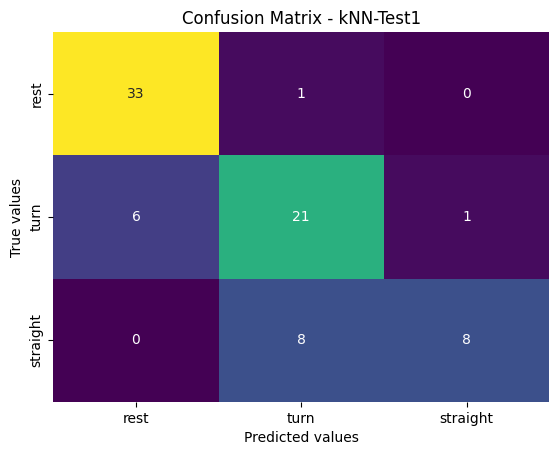


Classification Report for kNN-Test1:
              precision    recall  f1-score   support

        rest       0.85      0.97      0.90        34
    straight       0.70      0.75      0.72        28
        turn       0.89      0.50      0.64        16

    accuracy                           0.79        78
   macro avg       0.81      0.74      0.76        78
weighted avg       0.80      0.79      0.79        78


Accuracy Score: 0.7948717948717948
Precision Score: 0.8116809116809116
Recall Score: 0.7401960784313726
F1 Score: 0.7560825066918596


In [28]:
evaluate_classification(y_test, grid.predict(X_test), ['rest', 'turn', 'straight'], 'kNN-Test1')

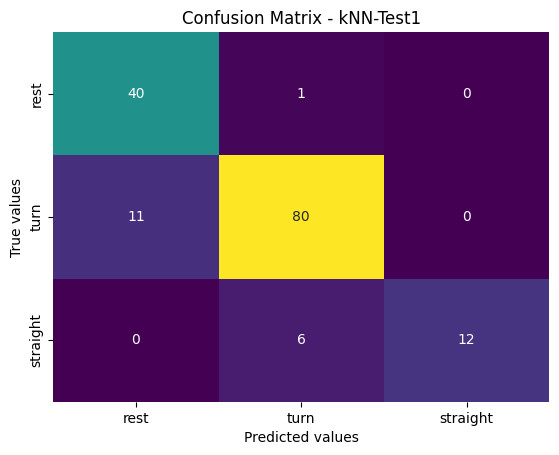


Classification Report for kNN-Test1:
              precision    recall  f1-score   support

        rest       0.78      0.98      0.87        41
    straight       0.92      0.88      0.90        91
        turn       1.00      0.67      0.80        18

    accuracy                           0.88       150
   macro avg       0.90      0.84      0.86       150
weighted avg       0.89      0.88      0.88       150


Accuracy Score: 0.88
Precision Score: 0.9012846517917512
Recall Score: 0.8404657672950355
F1 Score: 0.8561472072952286


In [26]:
evaluate_classification(y2, grid.predict(X2), ['rest', 'turn', 'straight'], 'kNN-Test1')

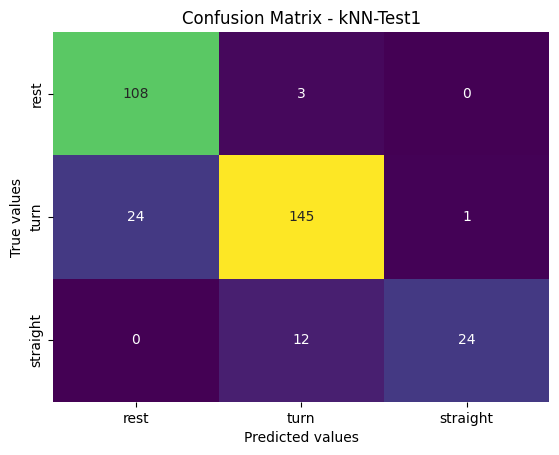


Classification Report for kNN-Test1:
              precision    recall  f1-score   support

        rest       0.82      0.97      0.89       111
    straight       0.91      0.85      0.88       170
        turn       0.96      0.67      0.79        36

    accuracy                           0.87       317
   macro avg       0.89      0.83      0.85       317
weighted avg       0.88      0.87      0.87       317


Accuracy Score: 0.8738170347003155
Precision Score: 0.8948106060606061
Recall Score: 0.8308602720367425
F1 Score: 0.8515206711928024


In [27]:
evaluate_classification(y3, grid.predict(X3), ['rest', 'turn', 'straight'], 'kNN-Test1')